In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [4]:
xdata = np.array([0.05, 0.1, 0.2, 0.5, 2.5, 12, 12.5, 25, 37.5, 50, 100, 125, 175, 200, 250])
ydata = np.array([-2.7, -1.2, 0.3, 8, 30.6, 37.8, 48.9, 54.3, 58.8, 61.1, 67.7, 69.9, 72.9, 72.5, 76.1])

In [5]:
global q0, qMAX
q0, qMAX = np.min(ydata), np.max(ydata)

In [7]:
def func1(Atot, Ptot, Kd):
    qA1 = q0 + (qMAX-q0) * (Ptot+Atot+Kd + ((Ptot+Atot+Kd)**2 - 4*Ptot*Atot)**0.5) / (2*Ptot)
    qA2 = q0 + (qMAX-q0) * (Ptot+Atot+Kd - ((Ptot+Atot+Kd)**2 - 4*Ptot*Atot)**0.5) / (2*Ptot)
    return qA1

def func2(Atot, Ptot, Kd):
    qA1 = q0 + (qMAX-q0) * (Ptot+Atot+Kd + ((Ptot+Atot+Kd)**2 - 4*Ptot*Atot)**0.5) / (2*Ptot)
    qA2 = q0 + (qMAX-q0) * (Ptot+Atot+Kd - ((Ptot+Atot+Kd)**2 - 4*Ptot*Atot)**0.5) / (2*Ptot)
    return qA2

In [51]:
popt1, pcov1 = curve_fit(func1, xdata, ydata)
popt2, pcov2 = curve_fit(func2, xdata, ydata)

y1 = func1(xdata, popt1[0], popt1[1])
y2 = func2(xdata, popt2[0], popt2[1])

r1, r2 = np.corrcoef(y1,ydata)[0][1], np.corrcoef(y2,ydata)[0][1]

(y,R) = (y1,r1) if r1>r2 else (y2,r2)


/home/ariel/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/ariel/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


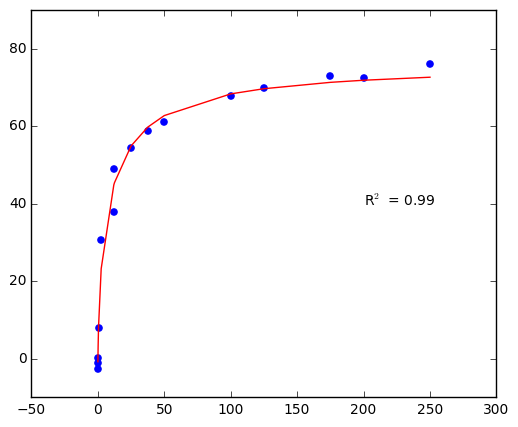

In [52]:
plt.figure(figsize=(6,5))
plt.plot(xdata,y, color='red')
plt.scatter(xdata, ydata, color='blue')
plt.text((xdata.max()-xdata.min())*0.8,(ydata.max()-ydata.min())*0.5,''.join([r'R${^2}$ = ',str('{0:.2f}'.format(R**2))]))
plt.show()

In [53]:
def func3(Atot, bMax1, Kd1, Kd2):
    return  (bMax1*Atot)/(Kd1+Atot) + (qMAX-bMax1*Atot)/(Kd2+Atot)

def func4(Atot, bMax, Kd):
    return (bMax*Atot)/(Kd+Atot) 

In [54]:
popt, pcov = curve_fit(func4, xdata, ydata, maxfev=10000)
y4 = func4(xdata, ydata.max(), popt[1])
R4 = np.corrcoef(y4,ydata)[0][1]

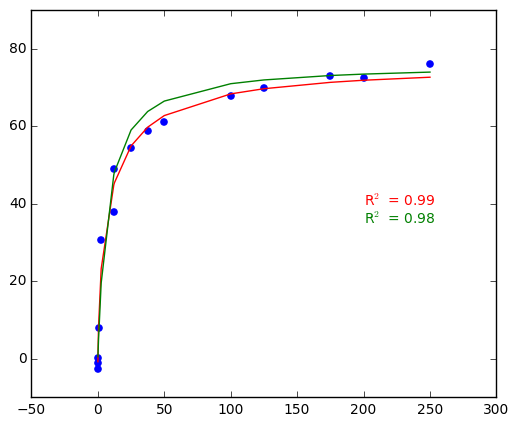

In [55]:
plt.figure(figsize=(6,5))
plt.plot(xdata,y, color='red')
plt.plot(xdata,y4, color='green')
plt.scatter(xdata, ydata, color='blue')
plt.text((xdata.max()-xdata.min())*0.8,(ydata.max()-ydata.min())*0.5,''.join([r'R${^2}$ = ',str('{0:.2f}'.format(R**2))]), color='red')
plt.text((xdata.max()-xdata.min())*0.8,(ydata.max()-ydata.min())*0.44,''.join([r'R${^2}$ = ',str('{0:.2f}'.format(R4**2))]), color='green')
plt.show()